<a href="https://colab.research.google.com/github/Auta01/Tensorflow-cases/blob/main/Hand%20fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working with a larger example (Multi -Class Classification)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
#The data has already been sorted intotraining and test set
(train_data,train_labels,), (test_data,test_labels)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
#show the first training data
print(f'Training sample:{train_data}')
print(f'Training labels:{train_labels}')

Training sample:[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Training labels:[9 0 0 ... 3 0 5]


In [4]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

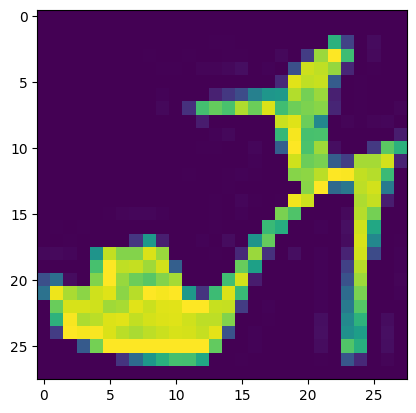

In [5]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[9])

In [6]:
#Create a small list so we can index onto our training labels so they re human readable
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
len(class_names)

10

Text(0.5, 1.0, 'Trouser')

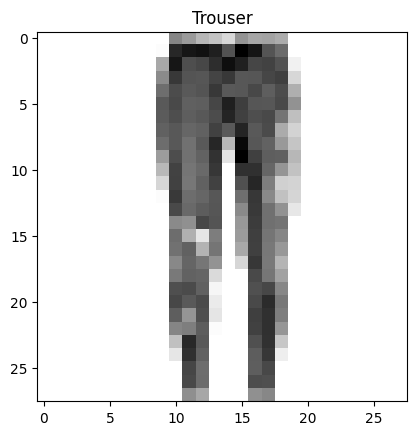

In [8]:
#plot an sample image and its label
index_of_choice = 78
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

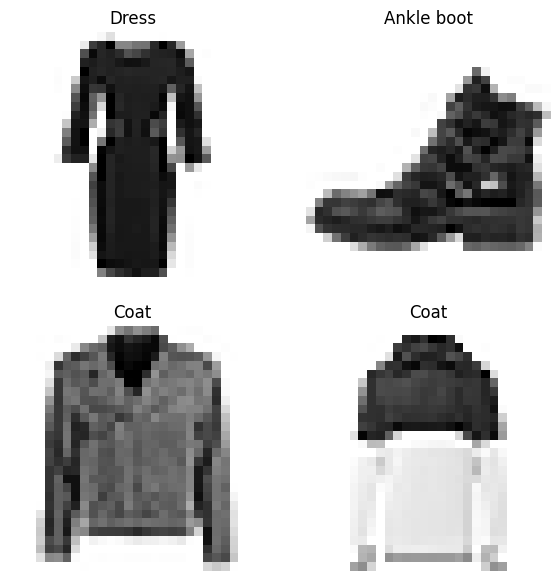

In [9]:
#plot multiple random image of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [10]:
##Building a multi-class classification model
#set random seed
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28, 28)),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax')

])

#2. Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

#3. Fit the model
non_norm_history=model.fit(train_data,
          train_labels,
          epochs=10,
          validation_data=(test_data, test_labels))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1658 - loss: 3.1271 - val_accuracy: 0.2568 - val_loss: 1.9559
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2460 - loss: 1.9064 - val_accuracy: 0.2525 - val_loss: 1.7900
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2878 - loss: 1.7183 - val_accuracy: 0.3168 - val_loss: 1.5411
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3242 - loss: 1.5492 - val_accuracy: 0.3077 - val_loss: 1.5227
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3258 - loss: 1.5055 - val_accuracy: 0.3350 - val_loss: 1.4883
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3354 - loss: 1.4810 - val_accuracy: 0.3273 - val_loss: 1.4753
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3394 - loss: 1.4562 - val_accuracy: 0.3369 - val_loss: 1.4409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3439 - loss: 1.4436 -

Improving

In [11]:
# we can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0  # Corrected to 255.0 for standard image normalization
test_data_norm = test_data / 255.0   # Corrected to 255.0 for standard image normalization

#check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [12]:
#now our data is normalised lets build a  model to find pattern init

#set a random seed
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

#fit the model
norm_history=model_2.fit(train_data,
            train_labels,
            epochs=10,
            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0993 - loss: 2.3737 - val_accuracy: 0.1053 - val_loss: 2.2936
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1091 - loss: 2.2840 - val_accuracy: 0.1475 - val_loss: 2.2399
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1405 - loss: 2.2089 - val_accuracy: 0.1470 - val_loss: 2.1758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1630 - loss: 2.1094 - val_accuracy: 0.2008 - val_loss: 1.9976
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2501 - loss: 1.8757 - val_accuracy: 0.3549 - val_loss: 1.6261
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3469 - loss: 1.5869 - val_accuracy: 0.3510 - val_loss: 1.4629
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3562 - loss: 1.4908 - val_accuracy: 0.3737 - val_loss: 1.4159
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3701 - loss: 1.4159 - 

lets compare the normalised and non-normalised

<Axes: title={'center': 'Non-Normalized data'}>

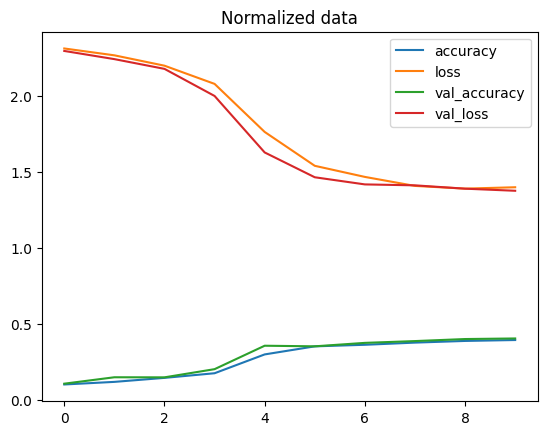

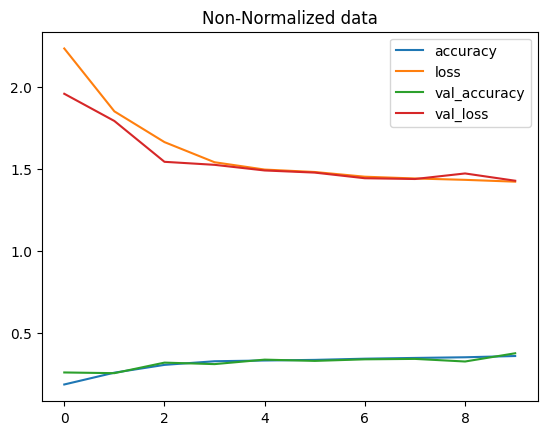

In [13]:
import pandas as pd
#plot non-normalised daata loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')

In [14]:
#Finding the ideal learning rate
#set a random seed
tf.random.set_seed(42)

#create a model
model_3 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
##compile the model
model_3.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

#Create the learning rate call-back
learning_rate_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#Fit the moddel
find_lr_history=model_3.fit(train_data_norm,
            train_labels,
            epochs=40,
            validation_data=(test_data_norm, test_labels),
            callbacks= [learning_rate_schedular])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4488 - loss: 1.3846 - val_accuracy: 0.7357 - val_loss: 0.7196 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7500 - loss: 0.6889 - val_accuracy: 0.7904 - val_loss: 0.6119 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7971 - loss: 0.5927 - val_accuracy: 0.8043 - val_loss: 0.5696 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8088 - loss: 0.5577 - val_accuracy: 0.8112 - val_loss: 0.5527 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8131 - loss: 0.5410 - val_accuracy: 0.8120 - val_loss: 0.5435 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8154 - loss: 0.5308 - val_accuracy: 0.8150 - val_loss: 0.5371 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8171 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

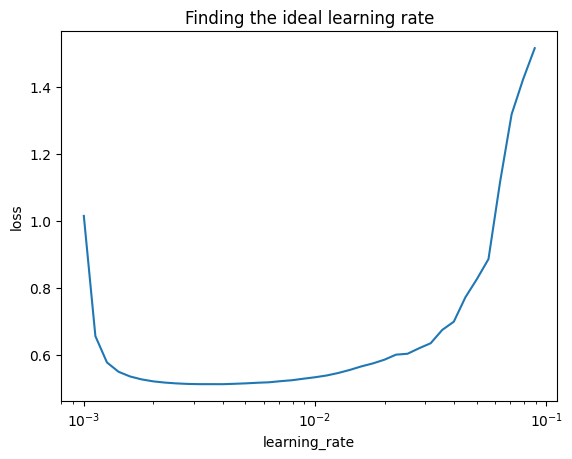

In [15]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate')



In [16]:
10**-3

0.001

In [67]:
#lets refit the model with ideal learnin rate
#set a random seed
tf.random.set_seed(42)

#create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#Fit the model
history = model_4.fit(train_data_norm, # Use normalized training data
                      train_labels,
                      epochs=20,
                      validation_data=(test_data_norm,test_labels)) # Use normalized test data

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4616 - loss: 1.5010 - val_accuracy: 0.7533 - val_loss: 0.7259
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7669 - loss: 0.6807 - val_accuracy: 0.7776 - val_loss: 0.6473
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7930 - loss: 0.6001 - val_accuracy: 0.7853 - val_loss: 0.6103
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8054 - loss: 0.5608 - val_accuracy: 0.7939 - val_loss: 0.5831
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8125 - loss: 0.5354 - val_accuracy: 0.7998 - val_loss: 0.5668
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8166 - loss: 0.5197 - val_accuracy: 0.8042 - val_loss: 0.5538
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8198 - loss: 0.5086 - val_accuracy: 0.8085 - val_loss: 0.5478
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8220 - loss: 0.5010 -

In [18]:
#Evaluating our multi-class classification model
model_4.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0978 - loss: 2.3027


[2.3026537895202637, 0.10000000149011612]

In [21]:
#Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    #create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    #lets pretify it
    fig, ax =plt.subplots(figsize=figsize)
    #create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #set labels to be classes
    n_classes = cm.shape[0]
    if classes:
      labels= classes
    else:
        labels =np.arange(n_classes)

    #labels the axes
    ax.set(title = 'Confusion_matrix',
           xlabel= 'Predicted Labels',
           ylabel='True labels',
           xticks= np.arange(n_classes),
           yticks= np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    #set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(20)

    #set threshold for different colors
    threshold = (cm.max()+cm.min())/2.
    #plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f'{cm[i,j]}({cm_norm[i,j]*100:.1f}%)',
               horizontalalignment='center',
               color='white' if cm[i,j ]>threshold else'black',
               size=15)


In [28]:
#make some predictions with our model
y_probs = model_4.predict(test_data_norm)

y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.09874227, 0.09928419, 0.10077012, 0.09999107, 0.0990243 ,
        0.10058819, 0.10242969, 0.10099429, 0.09826124, 0.09991469],
       [0.09874227, 0.09928419, 0.10077012, 0.09999107, 0.0990243 ,
        0.10058819, 0.10242969, 0.10099429, 0.09826124, 0.09991469],
       [0.09874227, 0.09928419, 0.10077012, 0.09999107, 0.0990243 ,
        0.10058819, 0.10242969, 0.10099429, 0.09826124, 0.09991469],
       [0.09874227, 0.09928419, 0.10077012, 0.09999107, 0.0990243 ,
        0.10058819, 0.10242969, 0.10099429, 0.09826124, 0.09991469],
       [0.09874227, 0.09928419, 0.10077012, 0.09999107, 0.0990243 ,
        0.10058819, 0.10242969, 0.10099429, 0.09826124, 0.09991469]],
      dtype=float32)

In [38]:
y_probs[0], tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([0.09874227, 0.09928419, 0.10077012, 0.09999107, 0.0990243 ,
        0.10058819, 0.10242969, 0.10099429, 0.09826124, 0.09991469],
       dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=6>,
 'Shirt')

In [32]:
#convert all  of the predictions into integers
y_preds = y_probs.argmax(axis=1)

In [39]:
y_preds[:5]

array([6, 6, 6, 6, 6])

In [40]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)


array([[   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0]])

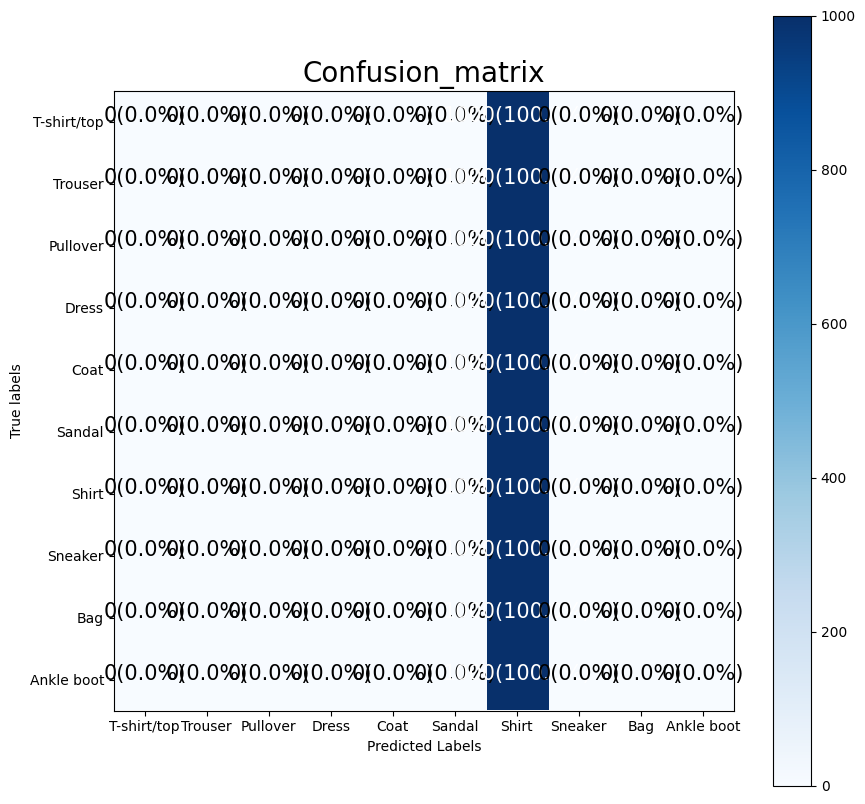

In [42]:
#make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(10,10),
                      text_size=10)

In [45]:
from matplotlib import image
import random

def plot_random_image(model, images, true_labels, classes):

  # set up random integers
  i = random.randint(0, len(images) - 1)

  # create prediction and integers
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  # add xlabel information (prediction/true label)
  plt.xlabel('pred:{} {:2.0f}% (True:{})'.format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
             color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


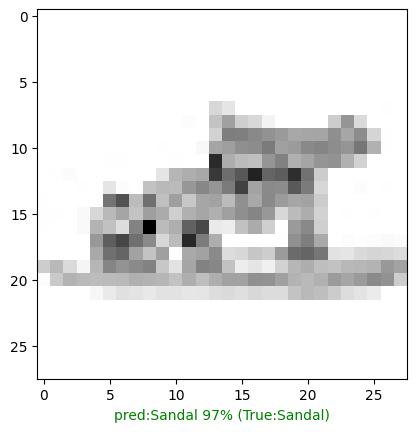

In [70]:
#chech out a random image as well as it s prediction
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [57]:
# what pattern is our model learning?

#find the layer of our most recent model

model_4.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [59]:
model_4.layers[1]

<Dense name=dense_9, built=True>

In [63]:
#get the pattern of the layer in our network
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.04246826,  0.00662144, -0.00401445,  0.04976767],
        [-0.07978856,  0.03991257,  0.04332431,  0.00888967],
        [ 0.05468701,  0.01475269,  0.07011309, -0.05552803],
        ...,
        [ 0.08349341,  0.05304706, -0.05821729,  0.02649266],
        [ 0.07372388,  0.06980447, -0.00771268, -0.07403325],
        [-0.05801418, -0.01383081, -0.04096691,  0.03844626]],
       dtype=float32),
 (784, 4))

In [69]:
#now lets check out the biases vector
biases = model_4.layers[1].get_weights()[1] # Re-fetch to ensure 'biases' is a numpy array
print(biases, biases.shape)

[1.634012  0.6466357 1.0343035 1.0612414] (4,)


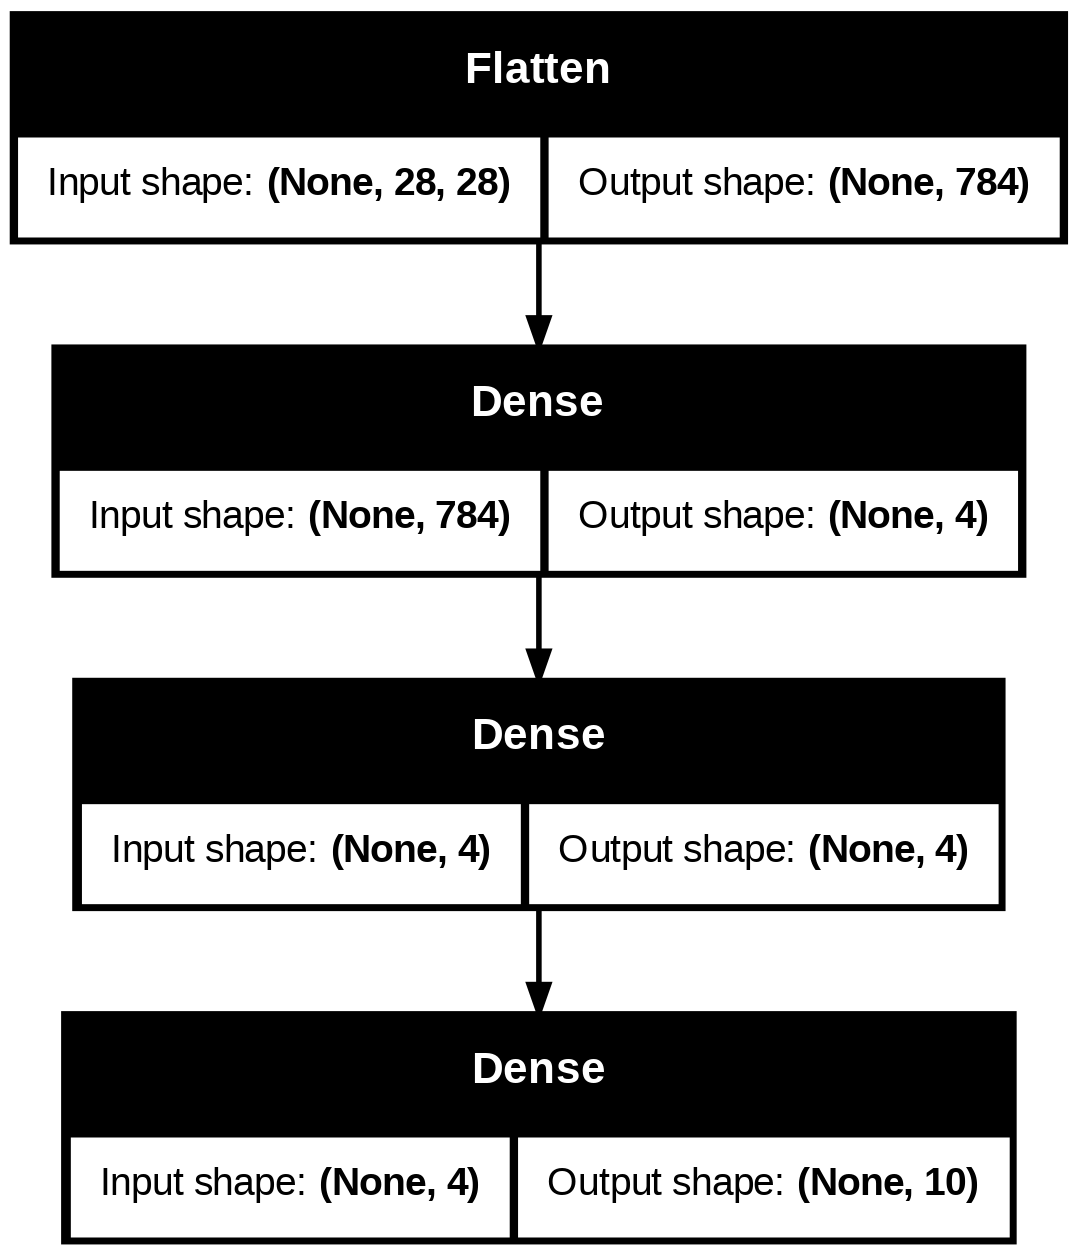

In [73]:
#lets check out another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model
# see the input and output layer of each layer
plot_model(model_4, show_shapes=True)
